<a href="https://colab.research.google.com/github/saitejanagula/Hyderabad_House_Rent_Prediction/blob/main/Hyderabad_House_Rent_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
#
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**Reading CSV file**

In [ ]:
df = pd.read_csv('/content/hyd_v2.csv')

**Size of the file**

In [ ]:
df.shape

(19110, 32)

**CHecking null values**

In [ ]:
df.isna().sum()


6                        0
balconies             9536
bathroom                 0
completeStreetName       2
deposit                  0
facing                9541
facingDesc            9541
floor                    0
furnishingDesc           0
gym                      0
id                       0
isMaintenance            0
lift                     0
loanAvailable            0
locality                 6
localityId               0
location                 0
maintenanceAmount     9658
ownerName                1
parking                  0
parkingDesc            950
propertyTitle            0
propertyType             0
property_age             0
property_size            0
reactivationSource    9916
rent_amount              0
sharedAccomodation       0
swimmingPool             0
totalFloor               0
type_bhk                 0
waterSupply           9224
dtype: int64

**Feacture Selection(Removing unwanted columns)**

In [ ]:
df = df[['balconies','facing','floor','furnishingDesc','lift','maintenanceAmount','property_age','property_size','rent_amount']]
df.head()

,balconies,facing,floor,furnishingDesc,lift,maintenanceAmount,property_age,property_size,rent_amount
0,3.000,W,3,Semi,True,2000.000,5,2200,28000
2,3.000,E,0,Semi,True,1000.000,0,1800,16000
3,1.000,W,2,Unfurnished,False,500.000,0,750,9000
4,2.000,E,2,Semi,True,2000.000,5,1250,32500
5,3.000,N,5,Semi,True,2700.000,1,1517,33000


In [ ]:
df.isna().sum()

balconies            0
facing               0
floor                0
furnishingDesc       0
lift                 0
maintenanceAmount    0
property_age         0
property_size        0
rent_amount          0
dtype: int64

**Removed all Null values**

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

balconies            0
facing               0
floor                0
furnishingDesc       0
lift                 0
maintenanceAmount    0
property_age         0
property_size        0
rent_amount          0
dtype: int64

**Filtering Wanted data**

In [ ]:
dataset = df.copy()
dataset = dataset[dataset['facing'].isin(['E', 'W', 'N', 'S'])]
dataset.head(51)

,balconies,facing,floor,furnishingDesc,lift,maintenanceAmount,property_age,property_size,rent_amount
0,3.000,W,3,Semi,True,2000.000,5,2200,28000
2,3.000,E,0,Semi,True,1000.000,0,1800,16000
3,1.000,W,2,Unfurnished,False,500.000,0,750,9000
4,2.000,E,2,Semi,True,2000.000,5,1250,32500
5,3.000,N,5,Semi,True,2700.000,1,1517,33000
6,1.000,E,20,Semi,True,4800.000,5,1198,29000
8,0.000,N,0,Semi,False,1000.000,5,1800,21000
10,1.000,N,2,Semi,False,800.000,1,950,14500
11,1.000,N,1,Unfurnished,False,500.000,1,900,10500
12,2.000,W,4,Semi,True,3000.000,5,1750,20000


**Replacing categorical values with numerical**

In [ ]:
dataset['facing'] = dataset['facing'].replace({'E':1,'W':2,'N':3,'S':4})

dataset['furnishingDesc'] = dataset['furnishingDesc'].replace({'Full':1,'Semi':2,'Unfurnished':3})


In [ ]:
dataset['lift'] = dataset['lift'].replace({'True': 1,'False': 0})
dataset.head(10)

,balconies,facing,floor,furnishingDesc,lift,maintenanceAmount,property_age,property_size,rent_amount
0,3.000,2,3,2,True,2000.000,5,2200,28000
2,3.000,1,0,2,True,1000.000,0,1800,16000
3,1.000,2,2,3,False,500.000,0,750,9000
4,2.000,1,2,2,True,2000.000,5,1250,32500
5,3.000,3,5,2,True,2700.000,1,1517,33000
6,1.000,1,20,2,True,4800.000,5,1198,29000
8,0.000,3,0,2,False,1000.000,5,1800,21000
10,1.000,3,2,2,False,800.000,1,950,14500
11,1.000,3,1,3,False,500.000,1,900,10500
12,2.000,2,4,2,True,3000.000,5,1750,20000


In [ ]:
dataset.dtypes

balconies            float64
facing                 int64
floor                  int64
furnishingDesc         int64
lift                    bool
maintenanceAmount    float64
property_age           int64
property_size          int64
rent_amount            int64
dtype: object

In [ ]:
dataset.dropna(inplace=True)
dataset.isna().sum()

balconies            0
facing               0
floor                0
furnishingDesc       0
lift                 0
maintenanceAmount    0
property_age         0
property_size        0
rent_amount          0
dtype: int64

In [ ]:
dataset['balconies'] = dataset['balconies'].astype('int64')
dataset['facing'] = dataset['facing'].astype('int64')
dataset['maintenanceAmount'] = dataset['maintenanceAmount'].astype('int64')
dataset.dtypes

balconies            int64
facing               int64
floor                int64
furnishingDesc       int64
lift                  bool
maintenanceAmount    int64
property_age         int64
property_size        int64
rent_amount          int64
dtype: object

In [ ]:
dataset.shape
dataset.head(10)

,balconies,facing,floor,furnishingDesc,lift,maintenanceAmount,property_age,property_size,rent_amount
0,3,2,3,2,True,2000,5,2200,28000
2,3,1,0,2,True,1000,0,1800,16000
3,1,2,2,3,False,500,0,750,9000
4,2,1,2,2,True,2000,5,1250,32500
5,3,3,5,2,True,2700,1,1517,33000
6,1,1,20,2,True,4800,5,1198,29000
8,0,3,0,2,False,1000,5,1800,21000
10,1,3,2,2,False,800,1,950,14500
11,1,3,1,3,False,500,1,900,10500
12,2,2,4,2,True,3000,5,1750,20000


In [ ]:

dataset['balconies'] = dataset['balconies'].astype('int64')
dataset['facing'] = dataset['facing'].astype('int64')
dataset['maintenanceAmount'] = dataset['maintenanceAmount'].astype('int64')
dataset['lift'] = dataset['lift'].astype('int64')
dataset.dtypes


balconies            int64
facing               int64
floor                int64
furnishingDesc       int64
lift                 int64
maintenanceAmount    int64
property_age         int64
property_size        int64
rent_amount          int64
dtype: object

In [ ]:
dataset.head(20)

,balconies,facing,floor,furnishingDesc,lift,maintenanceAmount,property_age,property_size,rent_amount
0,3,2,3,2,1,2000,5,2200,28000
2,3,1,0,2,1,1000,0,1800,16000
3,1,2,2,3,0,500,0,750,9000
4,2,1,2,2,1,2000,5,1250,32500
5,3,3,5,2,1,2700,1,1517,33000
6,1,1,20,2,1,4800,5,1198,29000
8,0,3,0,2,0,1000,5,1800,21000
10,1,3,2,2,0,800,1,950,14500
11,1,3,1,3,0,500,1,900,10500
12,2,2,4,2,1,3000,5,1750,20000


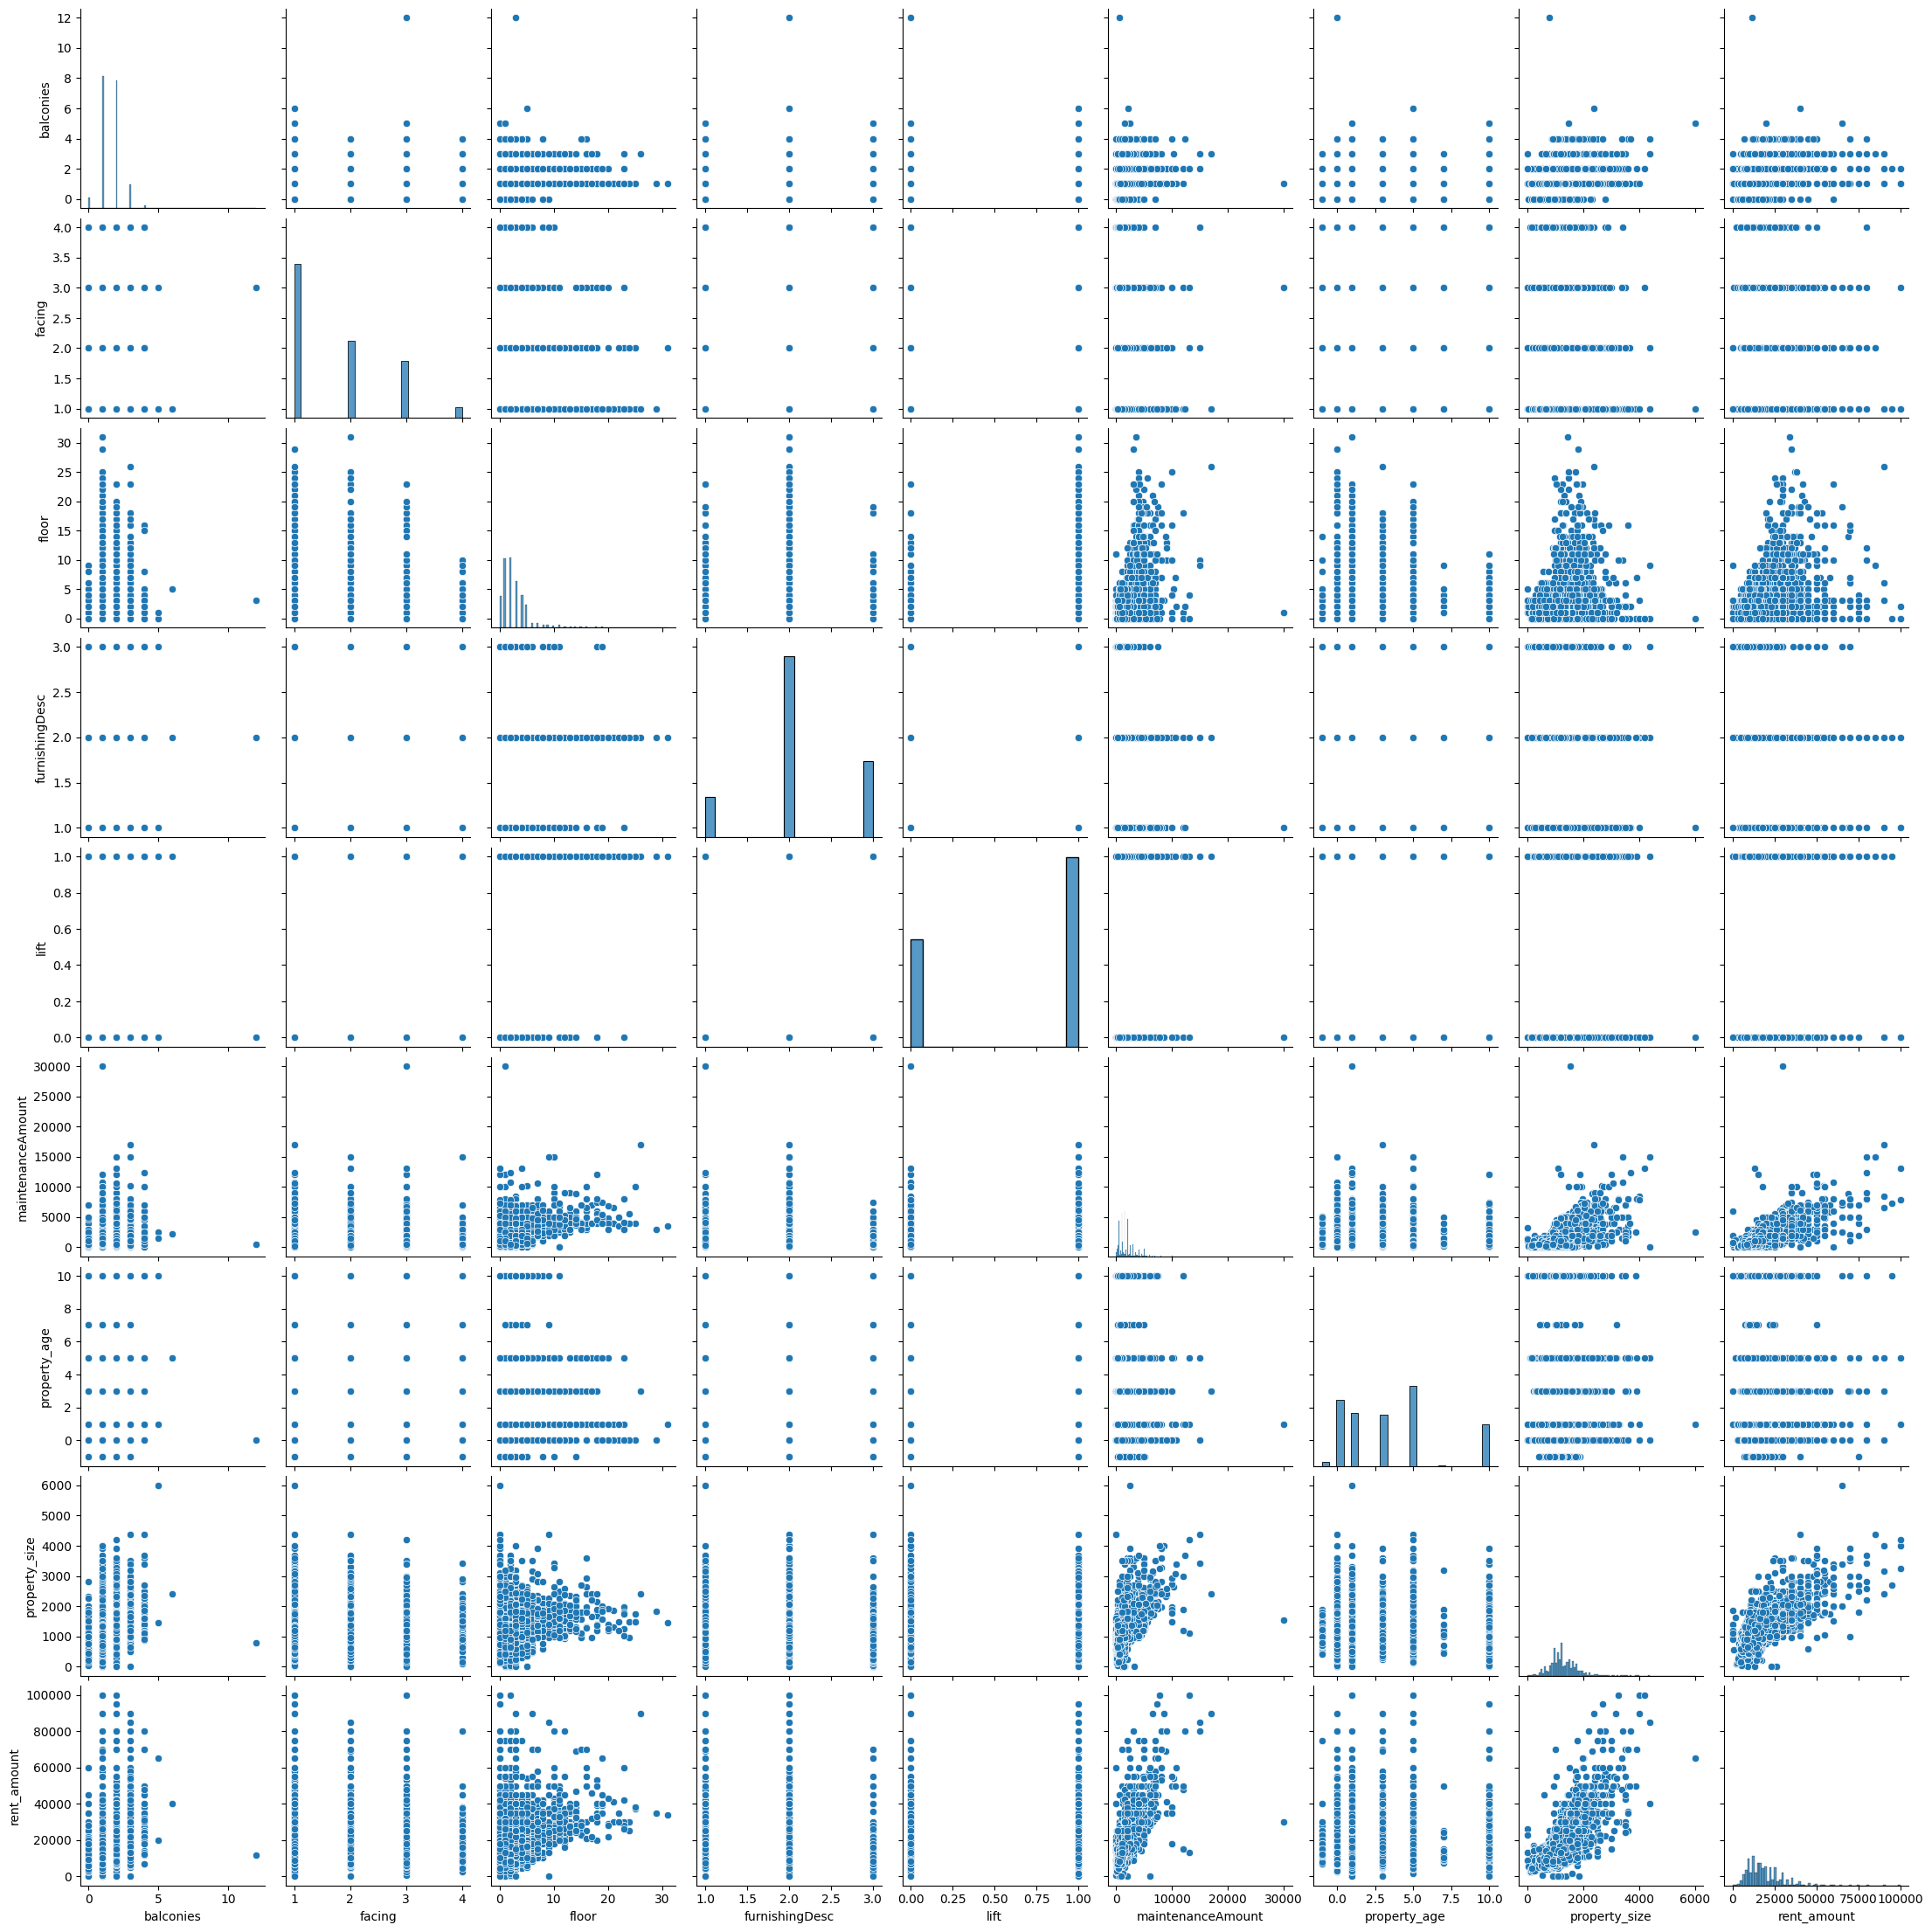

In [317]:
sns.pairplot(dataset)

In [ ]:
dataset.dtypes

balconies            int64
facing               int64
floor                int64
furnishingDesc       int64
lift                 int64
maintenanceAmount    int64
property_age         int64
property_size        int64
rent_amount          int64
dtype: object

**Spliting Data into Training and Testing**

In [ ]:
x= dataset.iloc[:,:-1]
y= dataset['rent_amount']

In [ ]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num',StandardScaler(),['balconies',	'facing'	,'floor'	,'furnishingDesc',	'lift', 'maintenanceAmount',	'property_age',	'property_size']),
#         ('cat',OneHotEncoder(),['locality',	'localityId',	'parking'])
#     ]
# )

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**list of models**

In [250]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'SuperVectorRegressor': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

In [251]:
# prompt: write the next step

for name, model in models.items():
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(f'{name}:')
  print('MSE:',mean_squared_error(y_test,y_pred))
  print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
  print('R2 Score:',r2_score(y_test,y_pred))
  print('-'*30)


Linear Regression:
MSE: 44197208.591960765
RMSE: 6648.098118406554
R2 Score: 0.62563909873771
------------------------------
Decision Tree:
MSE: 60196574.61358575
RMSE: 7758.6451532201
R2 Score: 0.49012065143535577
------------------------------
Random Forest:
MSE: 34677146.02022324
RMSE: 5888.730425161542
R2 Score: 0.7062762999992691
------------------------------
XGBoost:
MSE: 35310981.067531094
RMSE: 5942.304356689507
R2 Score: 0.7009075659293769
------------------------------
SuperVectorRegressor:
MSE: 120808067.87065957
RMSE: 10991.272349944731
R2 Score: -0.02327315703015609
------------------------------
KNeighborsRegressor:
MSE: 39247492.633496664
RMSE: 6264.781930242797
R2 Score: 0.6675643737999908
------------------------------


In [261]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [264]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

print("MSE:", mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))

MSE: 60415046.32739421
RMSE: 7772.7116457124675
R2 Score: 0.4882701438968202


**Selecting best model based on cost functions**

In [259]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [295]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 34469523.78133976
RMSE: 5871.075181032837
R2 Score: 0.7080349098967424


**Increasing the accuracy by scaling and by regularization**

In [320]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
best_model.fit(x_train_scaled, y_train)
y_pred = best_model.predict(x_test_scaled)


print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 34234490.72940785
RMSE: 5851.024758912566
R2 Score: 0.7100256959203571


In [310]:

rf_regularized = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2)
rf_regularized.fit(x_train_scaled, y_train)
y_pred_regularized = rf_regularized.predict(x_test_scaled)

print("MSE (Regularized):", mean_squared_error(y_test, y_pred_regularized))
print("RMSE (Regularized):", np.sqrt(mean_squared_error(y_test, y_pred_regularized)))
print("R2 Score (Regularized):", r2_score(y_test, y_pred_regularized))



MSE (Regularized): 33337642.79806203
RMSE (Regularized): 5773.875890427679
R2 Score (Regularized): 0.7176222118671789


**Entering manual data**

In [311]:
balconies = int(input("Enter number of balconies: "))
facing = int(input("Enter facing (1 for East, 2 for West, 3 for North, 4 for South): "))
floor = int(input("Enter floor number: "))
furnishingDesc = int(input("Enter furnishing (1 for Full, 2 for Semi, 3 for Unfurnished): "))
lift = int(input("Enter lift availability (1 for True, 0 for False): "))
maintenanceAmount = int(input("Enter maintenance amount: "))
property_age = int(input("Enter property age: "))
property_size = int(input("Enter property size: "))

# Create a NumPy array from the input data
input_data = np.array([balconies, facing, floor, furnishingDesc, lift,
                      maintenanceAmount, property_age, property_size]).reshape(1, -1)

# Scale the input data using the same scaler used for training
input_data_scaled = scaler.transform(input_data)

# Predict the rent amount using the best model
predicted_rent = best_model.predict(input_data_scaled)

print("Predicted Rent Amount:", predicted_rent[0])

Enter number of balconies: 3
Enter facing (1 for East, 2 for West, 3 for North, 4 for South): 2
Enter floor number: 3
Enter furnishing (1 for Full, 2 for Semi, 3 for Unfurnished): 2
Enter lift availability (1 for True, 0 for False): 1
Enter maintenance amount: 2000
Enter property age: 5
Enter property size: 2200
Predicted Rent Amount: 28601.118348155116


In [318]:
dataset

,balconies,facing,floor,furnishingDesc,lift,maintenanceAmount,property_age,property_size,rent_amount
0,3,2,3,2,1,2000,5,2200,28000
2,3,1,0,2,1,1000,0,1800,16000
3,1,2,2,3,0,500,0,750,9000
4,2,1,2,2,1,2000,5,1250,32500
5,3,3,5,2,1,2700,1,1517,33000
6,1,1,20,2,1,4800,5,1198,29000
8,0,3,0,2,0,1000,5,1800,21000
10,1,3,2,2,0,800,1,950,14500
11,1,3,1,3,0,500,1,900,10500
12,2,2,4,2,1,3000,5,1750,20000


**Feature importance graph**

             Feature  Importance
5  maintenanceAmount       0.520
7      property_size       0.373
2              floor       0.029
3     furnishingDesc       0.026
6       property_age       0.019
0          balconies       0.016
1             facing       0.010
4               lift       0.007


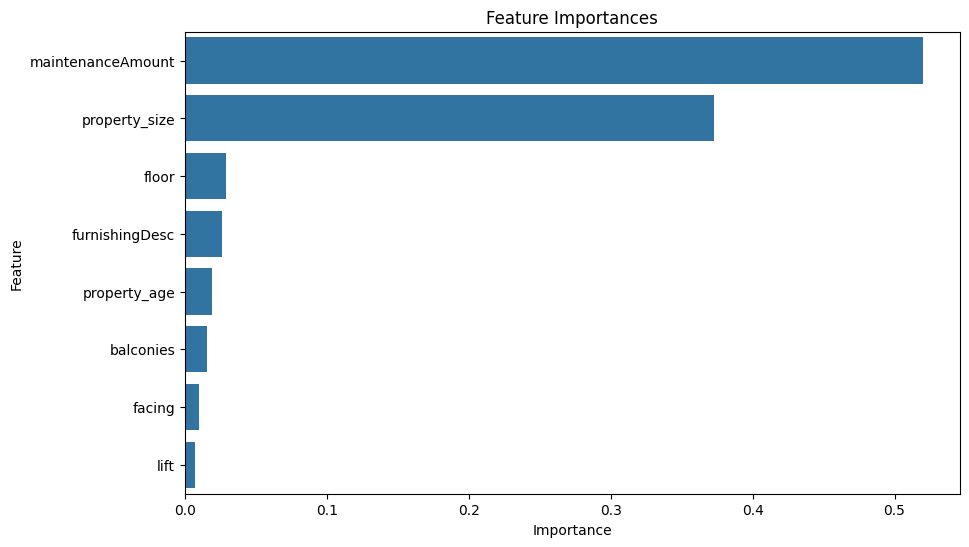

In [271]:
# prompt: then what next

# Analyze feature importances
feature_importances = best_model.feature_importances_
feature_names = x_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


In [312]:
feature_names = x.columns.tolist()

**Average rent based on all parameters**

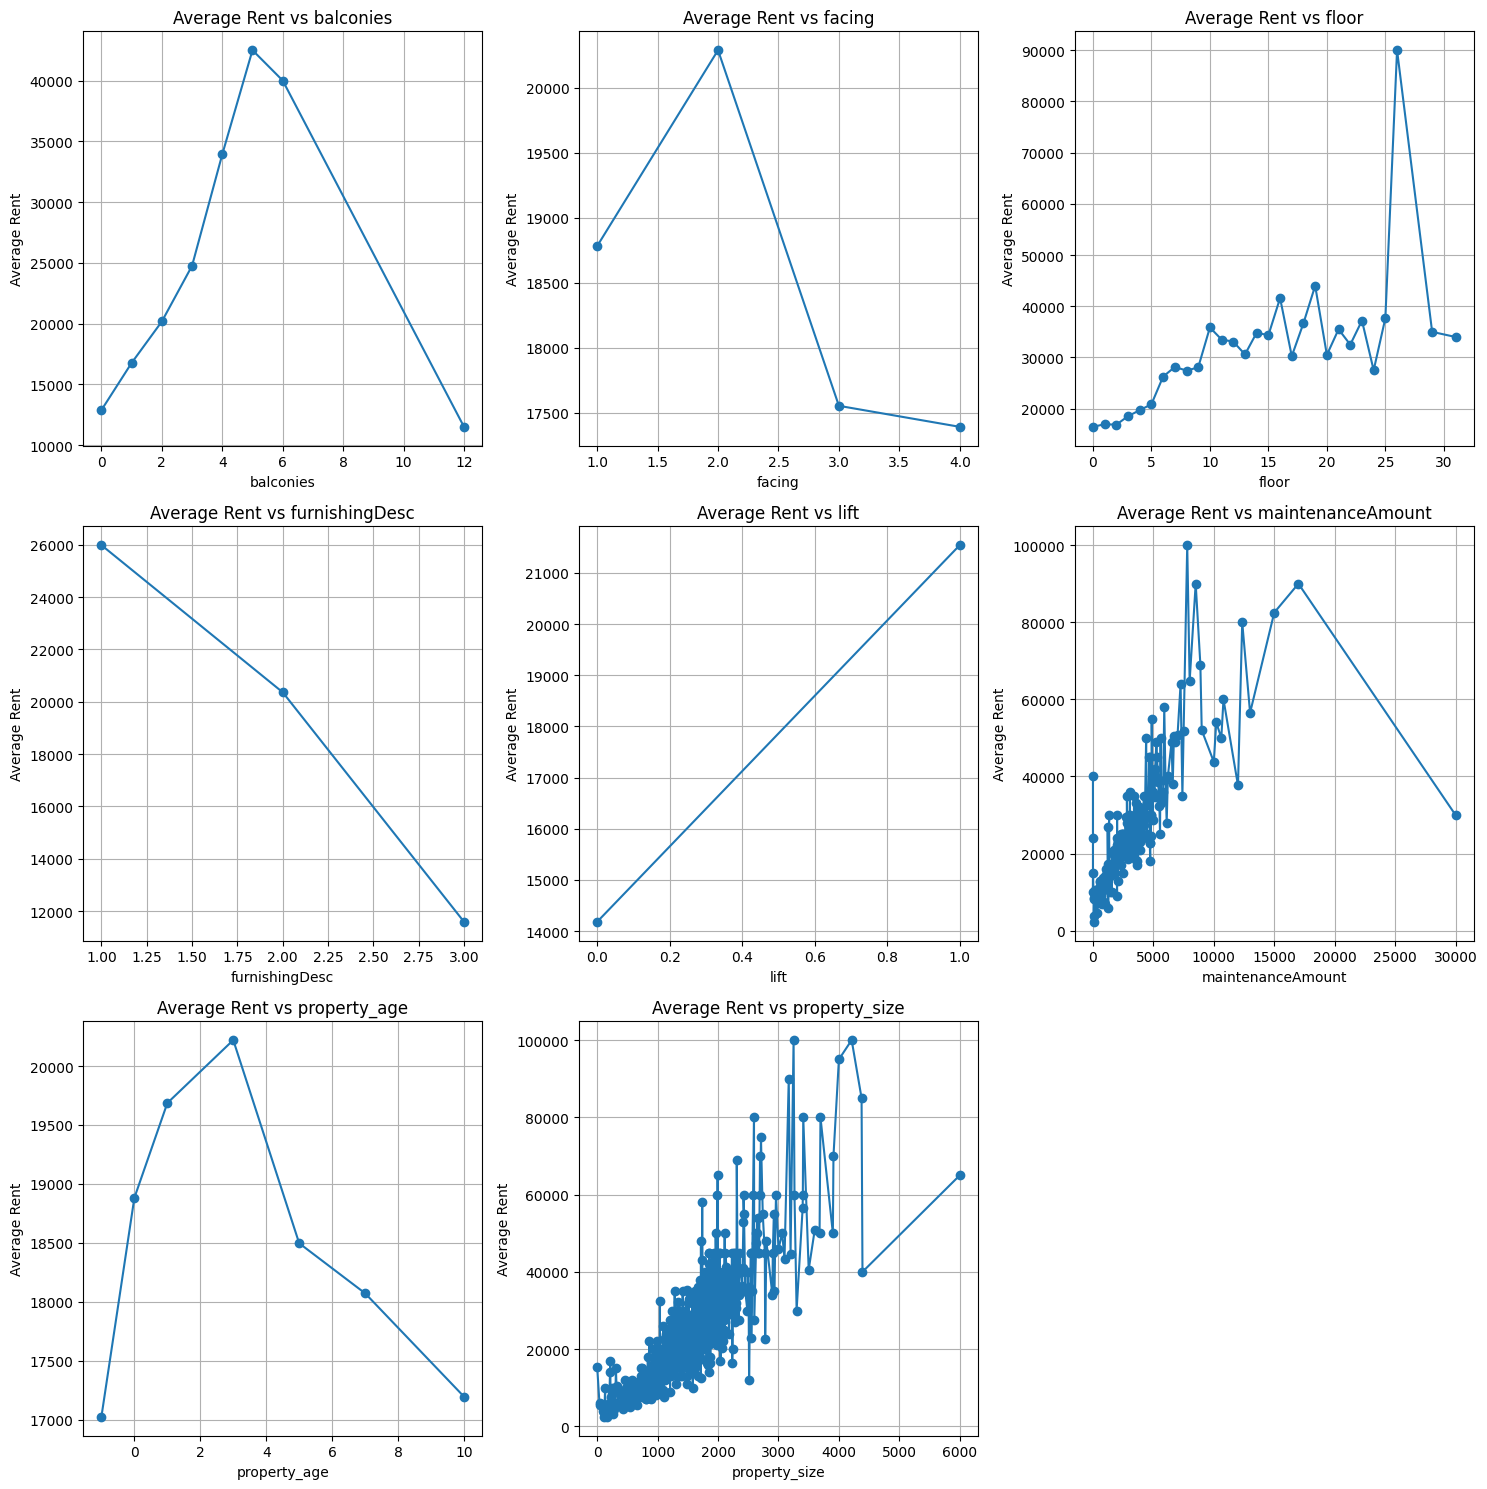

In [319]:


# Calculate average rent for each value of each feature
average_rents = {}
for feature in feature_names:
  average_rents[feature] = dataset.groupby(feature)['rent_amount'].mean()

# Plot line charts for each feature
plt.figure(figsize=(15, 15))
for i, feature in enumerate(feature_names):
  plt.subplot(3, 3, i+1)  # Adjust subplot layout as needed
  average_rents[feature].plot(kind='line', marker='o')
  plt.title(f'Average Rent vs {feature}')
  plt.xlabel(feature)
  plt.ylabel('Average Rent')
  plt.grid(True)

plt.tight_layout()
plt.show()
